In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [5]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


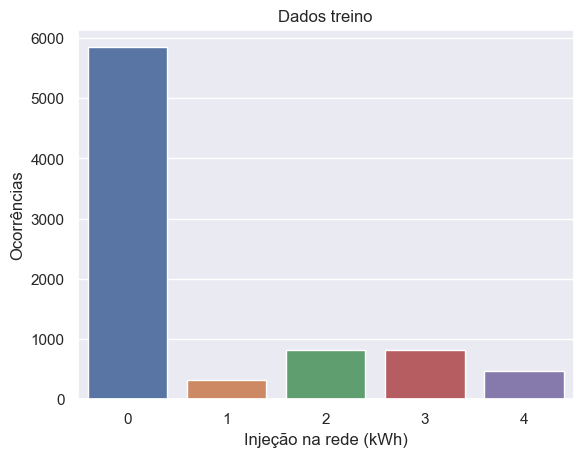

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


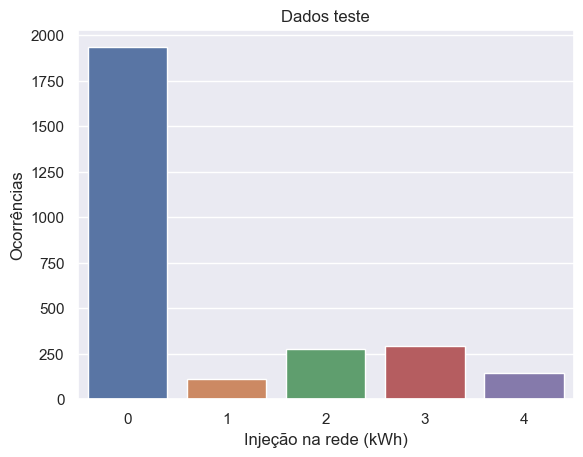

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [9]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [12]:
def build_model(activation='sigmoid', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=10, activation=activation))
    model.add(Dense(12, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  
    
    # Compile the model
    model.compile(
         loss='binary_crossentropy',  
        # loss = 'categorical_crossentropy',
        # loss = 'sparse_categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [14]:
X.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,13.97,13.54,11.45,14.04,81,4,3
1,0.0,0.0,0.0,13.48,13.02,13.43,13.90,82,4,3
2,0.0,0.0,0.0,12.93,12.47,12.72,13.43,84,4,3
3,0.0,0.0,0.0,12.61,12.15,10.34,12.93,85,4,3
4,0.0,0.0,0.0,12.61,12.17,9.79,12.93,86,4,3


In [15]:
X_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.765432,0.428571,0.666667
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.777778,0.428571,0.666667
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.802469,0.428571,0.666667
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.814815,0.428571,0.666667
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.827160,0.428571,0.666667


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=2022)

In [17]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [18]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

In [19]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 30, validation_split = 0.2, epochs = 20)

In [20]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpuw8vos8i\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpuw8vos8i\assets


Fitting 7 folds for each of 3 candidates, totalling 21 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpdwl05gvh\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpdwl05gvh\assets


Epoch 1/120
189/189 [==============================] - 2s 4ms/step - loss: -0.7280 - accuracy: 0.2629 - precision: 0.3788 - recall: 0.9785 - val_loss: -3.7770 - val_accuracy: 0.7036 - val_precision: 0.8782 - val_recall: 0.9386
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.8942 - accuracy: 0.6841 - precision: 0.8507 - recall: 0.9714 - val_loss: -10.7880 - val_accuracy: 0.7078 - val_precision: 0.8761 - val_recall: 0.9730
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.5957 - accuracy: 0.6972 - precision: 0.8873 - recall: 0.9666 - val_loss: -16.7825 - val_accuracy: 0.7085 - val_precision: 0.8849 - val_recall: 0.9631
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8456 - accuracy: 0.7037 - precision: 0.9086 - recall: 0.9541 - val_loss: -22.3607 - val_accuracy: 0.7057 - val_precision: 0.8770 - val_recall: 0.9631
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.7245 - a

189/189 [==============================] - 0s 2ms/step - loss: -200.6975 - accuracy: 0.7096 - precision: 0.9376 - recall: 0.9321 - val_loss: -193.4794 - val_accuracy: 0.7191 - val_precision: 0.9401 - val_recall: 0.9263
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -206.0887 - accuracy: 0.7082 - precision: 0.9338 - recall: 0.9327 - val_loss: -197.8633 - val_accuracy: 0.7205 - val_precision: 0.9260 - val_recall: 0.9533
Epoch 38/120
189/189 [==============================] - 0s 3ms/step - loss: -212.2335 - accuracy: 0.7113 - precision: 0.9408 - recall: 0.9368 - val_loss: -200.4889 - val_accuracy: 0.7121 - val_precision: 0.9537 - val_recall: 0.8600
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.1925 - accuracy: 0.7101 - precision: 0.9409 - recall: 0.9297 - val_loss: -208.8764 - val_accuracy: 0.7219 - val_precision: 0.9305 - val_recall: 0.9533
Epoch 40/120
189/189 [==============================] - 0s 3ms/step - loss: -224.0035

189/189 [==============================] - 1s 3ms/step - loss: -397.2442 - accuracy: 0.7094 - precision: 0.9343 - recall: 0.9410 - val_loss: -378.4348 - val_accuracy: 0.7212 - val_precision: 0.9470 - val_recall: 0.9214
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -399.7815 - accuracy: 0.7085 - precision: 0.9321 - recall: 0.9410 - val_loss: -373.9180 - val_accuracy: 0.7078 - val_precision: 0.8849 - val_recall: 0.9631
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -407.9033 - accuracy: 0.7110 - precision: 0.9388 - recall: 0.9416 - val_loss: -387.4727 - val_accuracy: 0.7219 - val_precision: 0.9324 - val_recall: 0.9484
Epoch 74/120
189/189 [==============================] - 0s 3ms/step - loss: -413.3820 - accuracy: 0.7094 - precision: 0.9403 - recall: 0.9297 - val_loss: -388.7621 - val_accuracy: 0.7149 - val_precision: 0.9072 - val_recall: 0.9607
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -418.3748

189/189 [==============================] - 0s 2ms/step - loss: -591.7231 - accuracy: 0.7101 - precision: 0.9405 - recall: 0.9333 - val_loss: -553.6246 - val_accuracy: 0.7142 - val_precision: 0.9590 - val_recall: 0.8624
Epoch 107/120
189/189 [==============================] - 0s 3ms/step - loss: -597.7328 - accuracy: 0.7126 - precision: 0.9484 - recall: 0.9303 - val_loss: -562.8622 - val_accuracy: 0.7177 - val_precision: 0.9155 - val_recall: 0.9582
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -602.3663 - accuracy: 0.7099 - precision: 0.9415 - recall: 0.9303 - val_loss: -574.0912 - val_accuracy: 0.7198 - val_precision: 0.9381 - val_recall: 0.9312
Epoch 109/120
189/189 [==============================] - 1s 3ms/step - loss: -610.9781 - accuracy: 0.7094 - precision: 0.9381 - recall: 0.9398 - val_loss: -577.9105 - val_accuracy: 0.7163 - val_precision: 0.9372 - val_recall: 0.9165
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -615.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_vhom9fb\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_vhom9fb\assets


Epoch 1/120
189/189 [==============================] - 1s 4ms/step - loss: -0.8575 - accuracy: 0.2800 - precision: 0.3891 - recall: 0.9711 - val_loss: -3.8964 - val_accuracy: 0.6789 - val_precision: 0.7803 - val_recall: 0.9540
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.0472 - accuracy: 0.6781 - precision: 0.8421 - recall: 0.9699 - val_loss: -10.4164 - val_accuracy: 0.7219 - val_precision: 0.8947 - val_recall: 0.9565
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7675 - accuracy: 0.6962 - precision: 0.8875 - recall: 0.9693 - val_loss: -16.2285 - val_accuracy: 0.7198 - val_precision: 0.8868 - val_recall: 0.9616
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8905 - accuracy: 0.6981 - precision: 0.8941 - recall: 0.9675 - val_loss: -21.7561 - val_accuracy: 0.7219 - val_precision: 0.8986 - val_recall: 0.9514
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.8588 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.3082 - accuracy: 0.7082 - precision: 0.9429 - recall: 0.9273 - val_loss: -182.1600 - val_accuracy: 0.7212 - val_precision: 0.8929 - val_recall: 0.9591
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -206.6230 - accuracy: 0.7078 - precision: 0.9417 - recall: 0.9256 - val_loss: -189.7234 - val_accuracy: 0.7269 - val_precision: 0.9286 - val_recall: 0.9309
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.8475 - accuracy: 0.7078 - precision: 0.9409 - recall: 0.9309 - val_loss: -194.5870 - val_accuracy: 0.7276 - val_precision: 0.9246 - val_recall: 0.9412
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -218.3490 - accuracy: 0.7080 - precision: 0.9379 - recall: 0.9368 - val_loss: -199.6206 - val_accuracy: 0.7283 - val_precision: 0.9421 - val_recall: 0.9156
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -223.0000

189/189 [==============================] - 0s 2ms/step - loss: -397.6363 - accuracy: 0.7087 - precision: 0.9499 - recall: 0.9179 - val_loss: -358.7150 - val_accuracy: 0.7248 - val_precision: 0.9093 - val_recall: 0.9488
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -402.0195 - accuracy: 0.7073 - precision: 0.9388 - recall: 0.9327 - val_loss: -365.3156 - val_accuracy: 0.7262 - val_precision: 0.9242 - val_recall: 0.9361
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -407.2924 - accuracy: 0.7073 - precision: 0.9428 - recall: 0.9250 - val_loss: -371.5751 - val_accuracy: 0.7283 - val_precision: 0.9356 - val_recall: 0.9284
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -412.2551 - accuracy: 0.7087 - precision: 0.9483 - recall: 0.9214 - val_loss: -372.5504 - val_accuracy: 0.7255 - val_precision: 0.9078 - val_recall: 0.9565
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -418.9862

189/189 [==============================] - 0s 2ms/step - loss: -592.1898 - accuracy: 0.7076 - precision: 0.9445 - recall: 0.9250 - val_loss: -538.9327 - val_accuracy: 0.7283 - val_precision: 0.9465 - val_recall: 0.9054
Epoch 107/120
189/189 [==============================] - 0s 3ms/step - loss: -598.6523 - accuracy: 0.7092 - precision: 0.9513 - recall: 0.9232 - val_loss: -546.7380 - val_accuracy: 0.7276 - val_precision: 0.9309 - val_recall: 0.9309
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -603.6063 - accuracy: 0.7085 - precision: 0.9459 - recall: 0.9297 - val_loss: -546.3036 - val_accuracy: 0.7269 - val_precision: 0.9181 - val_recall: 0.9463
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -608.6470 - accuracy: 0.7082 - precision: 0.9462 - recall: 0.9244 - val_loss: -553.2328 - val_accuracy: 0.7276 - val_precision: 0.9488 - val_recall: 0.9003
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -615.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpf6fkctn_\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpf6fkctn_\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8206 - accuracy: 0.2782 - precision: 0.3860 - recall: 0.9708 - val_loss: -3.6707 - val_accuracy: 0.6747 - val_precision: 0.7586 - val_recall: 0.9667
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.0092 - accuracy: 0.6812 - precision: 0.8440 - recall: 0.9702 - val_loss: -10.0451 - val_accuracy: 0.7043 - val_precision: 0.8254 - val_recall: 0.9821
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7230 - accuracy: 0.6966 - precision: 0.8854 - recall: 0.9666 - val_loss: -15.7260 - val_accuracy: 0.7262 - val_precision: 0.9121 - val_recall: 0.9308
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.9835 - accuracy: 0.7010 - precision: 0.9005 - recall: 0.9595 - val_loss: -20.9514 - val_accuracy: 0.7121 - val_precision: 0.8578 - val_recall: 0.9590
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.9120 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.8441 - accuracy: 0.7086 - precision: 0.9330 - recall: 0.9369 - val_loss: -181.5807 - val_accuracy: 0.7297 - val_precision: 0.9302 - val_recall: 0.9231
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -206.6947 - accuracy: 0.7075 - precision: 0.9279 - recall: 0.9422 - val_loss: -185.2475 - val_accuracy: 0.7248 - val_precision: 0.9397 - val_recall: 0.8795
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -213.2877 - accuracy: 0.7077 - precision: 0.9368 - recall: 0.9273 - val_loss: -191.4886 - val_accuracy: 0.7283 - val_precision: 0.9152 - val_recall: 0.9410
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -219.7335 - accuracy: 0.7084 - precision: 0.9362 - recall: 0.9345 - val_loss: -196.4835 - val_accuracy: 0.7311 - val_precision: 0.9306 - val_recall: 0.9282
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -224.5953

189/189 [==============================] - 0s 2ms/step - loss: -396.7966 - accuracy: 0.7080 - precision: 0.9354 - recall: 0.9309 - val_loss: -356.1897 - val_accuracy: 0.7297 - val_precision: 0.9198 - val_recall: 0.9410
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -404.3759 - accuracy: 0.7080 - precision: 0.9337 - recall: 0.9398 - val_loss: -360.7383 - val_accuracy: 0.7290 - val_precision: 0.9323 - val_recall: 0.9179
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -407.8773 - accuracy: 0.7096 - precision: 0.9377 - recall: 0.9321 - val_loss: -366.6851 - val_accuracy: 0.7304 - val_precision: 0.9241 - val_recall: 0.9359
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -414.8232 - accuracy: 0.7100 - precision: 0.9410 - recall: 0.9315 - val_loss: -371.1333 - val_accuracy: 0.7311 - val_precision: 0.9328 - val_recall: 0.9256
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -419.8747

189/189 [==============================] - 0s 2ms/step - loss: -593.5936 - accuracy: 0.7089 - precision: 0.9380 - recall: 0.9369 - val_loss: -530.2797 - val_accuracy: 0.7283 - val_precision: 0.9150 - val_recall: 0.9385
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -598.6042 - accuracy: 0.7098 - precision: 0.9421 - recall: 0.9297 - val_loss: -536.5585 - val_accuracy: 0.7318 - val_precision: 0.9354 - val_recall: 0.9282
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -607.0498 - accuracy: 0.7102 - precision: 0.9419 - recall: 0.9369 - val_loss: -541.1014 - val_accuracy: 0.7318 - val_precision: 0.9375 - val_recall: 0.9231
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -609.4365 - accuracy: 0.7102 - precision: 0.9352 - recall: 0.9452 - val_loss: -544.6927 - val_accuracy: 0.7297 - val_precision: 0.9217 - val_recall: 0.9359
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -617.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpwyb2rqid\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpwyb2rqid\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8495 - accuracy: 0.2805 - precision: 0.3854 - recall: 0.9772 - val_loss: -4.0210 - val_accuracy: 0.6860 - val_precision: 0.8130 - val_recall: 0.9603
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.0236 - accuracy: 0.6884 - precision: 0.8545 - recall: 0.9790 - val_loss: -10.6365 - val_accuracy: 0.7121 - val_precision: 0.8818 - val_recall: 0.9628
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.5902 - accuracy: 0.7004 - precision: 0.8893 - recall: 0.9724 - val_loss: -16.4191 - val_accuracy: 0.7135 - val_precision: 0.8874 - val_recall: 0.9578
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.6265 - accuracy: 0.7026 - precision: 0.8989 - recall: 0.9646 - val_loss: -21.9628 - val_accuracy: 0.7149 - val_precision: 0.8970 - val_recall: 0.9504
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.4602 - a

189/189 [==============================] - 0s 2ms/step - loss: -200.2337 - accuracy: 0.7102 - precision: 0.9404 - recall: 0.9263 - val_loss: -180.8951 - val_accuracy: 0.7142 - val_precision: 0.9543 - val_recall: 0.8288
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -205.2554 - accuracy: 0.7126 - precision: 0.9417 - recall: 0.9305 - val_loss: -193.0936 - val_accuracy: 0.7219 - val_precision: 0.9409 - val_recall: 0.9082
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -210.3685 - accuracy: 0.7112 - precision: 0.9360 - recall: 0.9376 - val_loss: -197.7864 - val_accuracy: 0.7170 - val_precision: 0.9377 - val_recall: 0.8958
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -215.1658 - accuracy: 0.7105 - precision: 0.9286 - recall: 0.9430 - val_loss: -201.4821 - val_accuracy: 0.7163 - val_precision: 0.9014 - val_recall: 0.9529
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -221.7258

189/189 [==============================] - 0s 2ms/step - loss: -395.2931 - accuracy: 0.7126 - precision: 0.9391 - recall: 0.9430 - val_loss: -368.7437 - val_accuracy: 0.7205 - val_precision: 0.9240 - val_recall: 0.9355
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -399.9940 - accuracy: 0.7114 - precision: 0.9393 - recall: 0.9376 - val_loss: -373.0164 - val_accuracy: 0.7191 - val_precision: 0.9381 - val_recall: 0.9032
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -404.9106 - accuracy: 0.7128 - precision: 0.9527 - recall: 0.9185 - val_loss: -378.4602 - val_accuracy: 0.7170 - val_precision: 0.9359 - val_recall: 0.9057
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -407.8331 - accuracy: 0.7102 - precision: 0.9381 - recall: 0.9269 - val_loss: -379.9770 - val_accuracy: 0.7149 - val_precision: 0.8972 - val_recall: 0.9529
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -416.0487

189/189 [==============================] - 0s 2ms/step - loss: -590.9289 - accuracy: 0.7130 - precision: 0.9507 - recall: 0.9245 - val_loss: -548.5572 - val_accuracy: 0.7198 - val_precision: 0.9345 - val_recall: 0.9206
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -594.7998 - accuracy: 0.7133 - precision: 0.9470 - recall: 0.9329 - val_loss: -541.0955 - val_accuracy: 0.7121 - val_precision: 0.8874 - val_recall: 0.9578
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -598.4700 - accuracy: 0.7103 - precision: 0.9338 - recall: 0.9382 - val_loss: -553.9340 - val_accuracy: 0.7170 - val_precision: 0.9054 - val_recall: 0.9504
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -605.4846 - accuracy: 0.7123 - precision: 0.9498 - recall: 0.9185 - val_loss: -565.1721 - val_accuracy: 0.7212 - val_precision: 0.9369 - val_recall: 0.9206
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjjus5tyr\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjjus5tyr\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.7911 - accuracy: 0.2951 - precision: 0.3918 - recall: 0.9737 - val_loss: -3.9598 - val_accuracy: 0.6994 - val_precision: 0.8176 - val_recall: 0.9695
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.1319 - accuracy: 0.6872 - precision: 0.8506 - recall: 0.9737 - val_loss: -10.4368 - val_accuracy: 0.7085 - val_precision: 0.8373 - val_recall: 0.9822
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7175 - accuracy: 0.6989 - precision: 0.8823 - recall: 0.9683 - val_loss: -15.7301 - val_accuracy: 0.7001 - val_precision: 0.8161 - val_recall: 0.9822
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8246 - accuracy: 0.7024 - precision: 0.8941 - recall: 0.9647 - val_loss: -21.9848 - val_accuracy: 0.7262 - val_precision: 0.9036 - val_recall: 0.9542
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.8052 - a

189/189 [==============================] - 0s 2ms/step - loss: -199.2996 - accuracy: 0.7121 - precision: 0.9367 - recall: 0.9378 - val_loss: -183.2968 - val_accuracy: 0.7311 - val_precision: 0.9191 - val_recall: 0.9542
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -204.0955 - accuracy: 0.7103 - precision: 0.9229 - recall: 0.9522 - val_loss: -189.4550 - val_accuracy: 0.7311 - val_precision: 0.9233 - val_recall: 0.9491
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -209.7205 - accuracy: 0.7102 - precision: 0.9272 - recall: 0.9444 - val_loss: -190.1072 - val_accuracy: 0.7212 - val_precision: 0.8868 - val_recall: 0.9567
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -213.4167 - accuracy: 0.7080 - precision: 0.9160 - recall: 0.9522 - val_loss: -198.8662 - val_accuracy: 0.7311 - val_precision: 0.9383 - val_recall: 0.9288
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -221.0891

189/189 [==============================] - 0s 2ms/step - loss: -390.7547 - accuracy: 0.7124 - precision: 0.9422 - recall: 0.9270 - val_loss: -359.5695 - val_accuracy: 0.7318 - val_precision: 0.9386 - val_recall: 0.9338
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -396.5182 - accuracy: 0.7119 - precision: 0.9326 - recall: 0.9438 - val_loss: -363.9138 - val_accuracy: 0.7311 - val_precision: 0.9212 - val_recall: 0.9517
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -401.2430 - accuracy: 0.7124 - precision: 0.9353 - recall: 0.9420 - val_loss: -367.0123 - val_accuracy: 0.7248 - val_precision: 0.9477 - val_recall: 0.8753
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -407.2132 - accuracy: 0.7139 - precision: 0.9435 - recall: 0.9288 - val_loss: -373.4898 - val_accuracy: 0.7276 - val_precision: 0.9420 - val_recall: 0.9084
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -411.1242

189/189 [==============================] - 0s 2ms/step - loss: -582.5825 - accuracy: 0.7130 - precision: 0.9444 - recall: 0.9240 - val_loss: -536.6928 - val_accuracy: 0.7332 - val_precision: 0.9412 - val_recall: 0.9364
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -587.9858 - accuracy: 0.7121 - precision: 0.9295 - recall: 0.9462 - val_loss: -542.2286 - val_accuracy: 0.7297 - val_precision: 0.9271 - val_recall: 0.9389
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -594.9107 - accuracy: 0.7124 - precision: 0.9396 - recall: 0.9312 - val_loss: -541.1672 - val_accuracy: 0.7297 - val_precision: 0.9187 - val_recall: 0.9491
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -597.7690 - accuracy: 0.7114 - precision: 0.9332 - recall: 0.9360 - val_loss: -550.5668 - val_accuracy: 0.7304 - val_precision: 0.9252 - val_recall: 0.9440
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -604.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7jlq70pj\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp7jlq70pj\assets


Epoch 1/120
189/189 [==============================] - 2s 6ms/step - loss: -0.9596 - accuracy: 0.3068 - precision: 0.3956 - recall: 0.9698 - val_loss: -3.9998 - val_accuracy: 0.7142 - val_precision: 0.8924 - val_recall: 0.9194
Epoch 2/120
189/189 [==============================] - 0s 3ms/step - loss: -8.2173 - accuracy: 0.6886 - precision: 0.8521 - recall: 0.9746 - val_loss: -10.8826 - val_accuracy: 0.7142 - val_precision: 0.8764 - val_recall: 0.9647
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7817 - accuracy: 0.7010 - precision: 0.8857 - recall: 0.9692 - val_loss: -16.5952 - val_accuracy: 0.7100 - val_precision: 0.8649 - val_recall: 0.9673
Epoch 4/120
189/189 [==============================] - 0s 3ms/step - loss: -20.7363 - accuracy: 0.7029 - precision: 0.8924 - recall: 0.9625 - val_loss: -22.3893 - val_accuracy: 0.7184 - val_precision: 0.8995 - val_recall: 0.9471
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.7479 - a

189/189 [==============================] - 0s 2ms/step - loss: -197.2412 - accuracy: 0.7119 - precision: 0.9333 - recall: 0.9378 - val_loss: -188.5781 - val_accuracy: 0.7241 - val_precision: 0.9427 - val_recall: 0.9118
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -202.8400 - accuracy: 0.7140 - precision: 0.9418 - recall: 0.9281 - val_loss: -191.9448 - val_accuracy: 0.7212 - val_precision: 0.9024 - val_recall: 0.9547
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -208.7545 - accuracy: 0.7144 - precision: 0.9374 - recall: 0.9408 - val_loss: -198.8866 - val_accuracy: 0.7269 - val_precision: 0.9456 - val_recall: 0.9194
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -214.2310 - accuracy: 0.7139 - precision: 0.9368 - recall: 0.9402 - val_loss: -204.4596 - val_accuracy: 0.7248 - val_precision: 0.9296 - val_recall: 0.9320
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -218.6801

189/189 [==============================] - 0s 2ms/step - loss: -390.4185 - accuracy: 0.7126 - precision: 0.9449 - recall: 0.9227 - val_loss: -364.0111 - val_accuracy: 0.7205 - val_precision: 0.9607 - val_recall: 0.8615
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -394.7396 - accuracy: 0.7117 - precision: 0.9343 - recall: 0.9366 - val_loss: -370.8639 - val_accuracy: 0.7248 - val_precision: 0.9150 - val_recall: 0.9496
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -400.4155 - accuracy: 0.7139 - precision: 0.9416 - recall: 0.9360 - val_loss: -375.5654 - val_accuracy: 0.7234 - val_precision: 0.9108 - val_recall: 0.9521
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -406.0651 - accuracy: 0.7142 - precision: 0.9462 - recall: 0.9239 - val_loss: -383.7852 - val_accuracy: 0.7248 - val_precision: 0.9449 - val_recall: 0.9068
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -413.3134

189/189 [==============================] - 0s 2ms/step - loss: -583.6102 - accuracy: 0.7124 - precision: 0.9368 - recall: 0.9408 - val_loss: -549.8505 - val_accuracy: 0.7255 - val_precision: 0.9383 - val_recall: 0.9194
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -591.1772 - accuracy: 0.7132 - precision: 0.9427 - recall: 0.9347 - val_loss: -553.8199 - val_accuracy: 0.7234 - val_precision: 0.9467 - val_recall: 0.8942
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -592.3400 - accuracy: 0.7137 - precision: 0.9457 - recall: 0.9257 - val_loss: -559.0292 - val_accuracy: 0.7248 - val_precision: 0.9449 - val_recall: 0.9068
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -598.6920 - accuracy: 0.7137 - precision: 0.9442 - recall: 0.9311 - val_loss: -566.5729 - val_accuracy: 0.7248 - val_precision: 0.9403 - val_recall: 0.9118
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -604.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxrfcr54o\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpxrfcr54o\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.6396 - accuracy: 0.2844 - precision: 0.3837 - recall: 0.9616 - val_loss: -3.4532 - val_accuracy: 0.6733 - val_precision: 0.7440 - val_recall: 0.9764
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.8228 - accuracy: 0.6849 - precision: 0.8470 - recall: 0.9712 - val_loss: -9.7992 - val_accuracy: 0.7015 - val_precision: 0.8065 - val_recall: 0.9843
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.5130 - accuracy: 0.7026 - precision: 0.8930 - recall: 0.9724 - val_loss: -15.2191 - val_accuracy: 0.7347 - val_precision: 0.9249 - val_recall: 0.9370
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.5599 - accuracy: 0.7047 - precision: 0.9042 - recall: 0.9586 - val_loss: -21.0342 - val_accuracy: 0.7304 - val_precision: 0.8954 - val_recall: 0.9659
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.5760 - ac

189/189 [==============================] - 0s 2ms/step - loss: -199.9924 - accuracy: 0.7144 - precision: 0.9450 - recall: 0.9393 - val_loss: -174.3226 - val_accuracy: 0.7241 - val_precision: 0.8744 - val_recall: 0.9685
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -205.1570 - accuracy: 0.7124 - precision: 0.9399 - recall: 0.9387 - val_loss: -183.0215 - val_accuracy: 0.7332 - val_precision: 0.9042 - val_recall: 0.9659
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -210.5935 - accuracy: 0.7114 - precision: 0.9346 - recall: 0.9441 - val_loss: -189.7901 - val_accuracy: 0.7375 - val_precision: 0.9302 - val_recall: 0.9449
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -215.8089 - accuracy: 0.7098 - precision: 0.9326 - recall: 0.9393 - val_loss: -194.4267 - val_accuracy: 0.7347 - val_precision: 0.9273 - val_recall: 0.9370
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -222.1205

189/189 [==============================] - 0s 2ms/step - loss: -394.1756 - accuracy: 0.7133 - precision: 0.9421 - recall: 0.9387 - val_loss: -352.2739 - val_accuracy: 0.7375 - val_precision: 0.9302 - val_recall: 0.9449
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -396.9533 - accuracy: 0.7096 - precision: 0.9331 - recall: 0.9375 - val_loss: -356.9392 - val_accuracy: 0.7361 - val_precision: 0.9256 - val_recall: 0.9475
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -405.3704 - accuracy: 0.7128 - precision: 0.9500 - recall: 0.9243 - val_loss: -361.6525 - val_accuracy: 0.7375 - val_precision: 0.9392 - val_recall: 0.9318
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -410.1586 - accuracy: 0.7132 - precision: 0.9410 - recall: 0.9393 - val_loss: -364.0795 - val_accuracy: 0.7339 - val_precision: 0.9084 - val_recall: 0.9633
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -413.9657

189/189 [==============================] - 0s 2ms/step - loss: -588.1396 - accuracy: 0.7130 - precision: 0.9463 - recall: 0.9309 - val_loss: -521.2432 - val_accuracy: 0.7361 - val_precision: 0.9452 - val_recall: 0.9055
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -593.7785 - accuracy: 0.7135 - precision: 0.9427 - recall: 0.9393 - val_loss: -524.0182 - val_accuracy: 0.7325 - val_precision: 0.9059 - val_recall: 0.9606
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -598.5501 - accuracy: 0.7144 - precision: 0.9480 - recall: 0.9309 - val_loss: -534.8159 - val_accuracy: 0.7368 - val_precision: 0.9254 - val_recall: 0.9449
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -601.7311 - accuracy: 0.7112 - precision: 0.9256 - recall: 0.9568 - val_loss: -539.9825 - val_accuracy: 0.7382 - val_precision: 0.9325 - val_recall: 0.9423
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpkeq3m1d8\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpkeq3m1d8\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.9733 - accuracy: 0.2839 - precision: 0.3873 - recall: 0.9684 - val_loss: -4.3939 - val_accuracy: 0.6768 - val_precision: 0.7980 - val_recall: 0.9705
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.4204 - accuracy: 0.6810 - precision: 0.8438 - recall: 0.9720 - val_loss: -11.0788 - val_accuracy: 0.6909 - val_precision: 0.8272 - val_recall: 0.9877
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -15.1369 - accuracy: 0.6988 - precision: 0.8899 - recall: 0.9684 - val_loss: -17.2161 - val_accuracy: 0.7170 - val_precision: 0.9211 - val_recall: 0.9459
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -21.2905 - accuracy: 0.7022 - precision: 0.9022 - recall: 0.9619 - val_loss: -23.0239 - val_accuracy: 0.7114 - val_precision: 0.8947 - val_recall: 0.9607
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -27.2472 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.5013 - accuracy: 0.7083 - precision: 0.9335 - recall: 0.9362 - val_loss: -192.8201 - val_accuracy: 0.7205 - val_precision: 0.9260 - val_recall: 0.9533
Epoch 37/120
189/189 [==============================] - 0s 3ms/step - loss: -207.4185 - accuracy: 0.7108 - precision: 0.9442 - recall: 0.9273 - val_loss: -199.1355 - val_accuracy: 0.7227 - val_precision: 0.9346 - val_recall: 0.9484
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -213.3716 - accuracy: 0.7112 - precision: 0.9403 - recall: 0.9386 - val_loss: -204.6622 - val_accuracy: 0.7219 - val_precision: 0.9386 - val_recall: 0.9386
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -218.2255 - accuracy: 0.7110 - precision: 0.9441 - recall: 0.9267 - val_loss: -210.0329 - val_accuracy: 0.7198 - val_precision: 0.9381 - val_recall: 0.9312
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -224.1412

189/189 [==============================] - 0s 2ms/step - loss: -397.4816 - accuracy: 0.7112 - precision: 0.9434 - recall: 0.9338 - val_loss: -377.4876 - val_accuracy: 0.7219 - val_precision: 0.9303 - val_recall: 0.9509
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -403.7014 - accuracy: 0.7112 - precision: 0.9445 - recall: 0.9333 - val_loss: -382.1294 - val_accuracy: 0.7212 - val_precision: 0.9320 - val_recall: 0.9435
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -408.2213 - accuracy: 0.7094 - precision: 0.9446 - recall: 0.9249 - val_loss: -387.4849 - val_accuracy: 0.7198 - val_precision: 0.9317 - val_recall: 0.9386
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -412.7191 - accuracy: 0.7076 - precision: 0.9299 - recall: 0.9410 - val_loss: -385.4369 - val_accuracy: 0.7107 - val_precision: 0.8947 - val_recall: 0.9607
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -418.4737

189/189 [==============================] - 0s 2ms/step - loss: -592.8056 - accuracy: 0.7105 - precision: 0.9437 - recall: 0.9297 - val_loss: -559.9551 - val_accuracy: 0.7205 - val_precision: 0.9260 - val_recall: 0.9533
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -595.6791 - accuracy: 0.7096 - precision: 0.9281 - recall: 0.9541 - val_loss: -566.3228 - val_accuracy: 0.7170 - val_precision: 0.9483 - val_recall: 0.9017
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -600.6139 - accuracy: 0.7097 - precision: 0.9409 - recall: 0.9303 - val_loss: -572.0460 - val_accuracy: 0.7219 - val_precision: 0.9325 - val_recall: 0.9509
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -609.5838 - accuracy: 0.7103 - precision: 0.9386 - recall: 0.9380 - val_loss: -579.4421 - val_accuracy: 0.7191 - val_precision: 0.9401 - val_recall: 0.9263
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -615.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzsgg74gq\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzsgg74gq\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.7144 - accuracy: 0.2687 - precision: 0.3843 - recall: 0.9758 - val_loss: -3.7324 - val_accuracy: 0.6747 - val_precision: 0.7678 - val_recall: 0.9642
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.9011 - accuracy: 0.6859 - precision: 0.8600 - recall: 0.9722 - val_loss: -10.2886 - val_accuracy: 0.7191 - val_precision: 0.8847 - val_recall: 0.9616
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.4603 - accuracy: 0.6939 - precision: 0.8818 - recall: 0.9693 - val_loss: -15.9966 - val_accuracy: 0.7177 - val_precision: 0.8824 - val_recall: 0.9591
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.7095 - accuracy: 0.7006 - precision: 0.9042 - recall: 0.9592 - val_loss: -21.5242 - val_accuracy: 0.7198 - val_precision: 0.8905 - val_recall: 0.9565
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.5757 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.4985 - accuracy: 0.7087 - precision: 0.9425 - recall: 0.9303 - val_loss: -183.5795 - val_accuracy: 0.7269 - val_precision: 0.9160 - val_recall: 0.9488
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -206.4556 - accuracy: 0.7087 - precision: 0.9452 - recall: 0.9268 - val_loss: -189.5967 - val_accuracy: 0.7283 - val_precision: 0.9291 - val_recall: 0.9386
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.1494 - accuracy: 0.7085 - precision: 0.9367 - recall: 0.9356 - val_loss: -194.8148 - val_accuracy: 0.7262 - val_precision: 0.9505 - val_recall: 0.8849
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.4035 - accuracy: 0.7076 - precision: 0.9407 - recall: 0.9273 - val_loss: -200.4496 - val_accuracy: 0.7248 - val_precision: 0.9455 - val_recall: 0.8875
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -223.4806

189/189 [==============================] - 0s 2ms/step - loss: -395.7878 - accuracy: 0.7101 - precision: 0.9425 - recall: 0.9392 - val_loss: -357.8671 - val_accuracy: 0.7248 - val_precision: 0.9093 - val_recall: 0.9488
Epoch 72/120
189/189 [==============================] - 0s 3ms/step - loss: -400.8116 - accuracy: 0.7105 - precision: 0.9404 - recall: 0.9409 - val_loss: -362.7729 - val_accuracy: 0.7262 - val_precision: 0.9100 - val_recall: 0.9565
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -408.2102 - accuracy: 0.7092 - precision: 0.9423 - recall: 0.9350 - val_loss: -372.0617 - val_accuracy: 0.7255 - val_precision: 0.9323 - val_recall: 0.9156
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -413.5640 - accuracy: 0.7080 - precision: 0.9415 - recall: 0.9321 - val_loss: -377.9861 - val_accuracy: 0.7241 - val_precision: 0.9253 - val_recall: 0.9182
Epoch 75/120
189/189 [==============================] - 0s 3ms/step - loss: -416.3325

189/189 [==============================] - 0s 2ms/step - loss: -592.6436 - accuracy: 0.7103 - precision: 0.9530 - recall: 0.9226 - val_loss: -536.3485 - val_accuracy: 0.7262 - val_precision: 0.9179 - val_recall: 0.9437
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -598.1523 - accuracy: 0.7092 - precision: 0.9549 - recall: 0.9126 - val_loss: -544.8508 - val_accuracy: 0.7276 - val_precision: 0.9443 - val_recall: 0.9105
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -602.7775 - accuracy: 0.7083 - precision: 0.9463 - recall: 0.9256 - val_loss: -547.4536 - val_accuracy: 0.7276 - val_precision: 0.9246 - val_recall: 0.9412
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -607.0901 - accuracy: 0.7076 - precision: 0.9414 - recall: 0.9297 - val_loss: -548.4125 - val_accuracy: 0.7241 - val_precision: 0.9547 - val_recall: 0.8619
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ndynati\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5ndynati\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.7296 - accuracy: 0.2711 - precision: 0.3814 - recall: 0.9714 - val_loss: -3.7021 - val_accuracy: 0.6768 - val_precision: 0.7636 - val_recall: 0.9692
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.0111 - accuracy: 0.6863 - precision: 0.8548 - recall: 0.9744 - val_loss: -10.2080 - val_accuracy: 0.7163 - val_precision: 0.8664 - val_recall: 0.9641
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7444 - accuracy: 0.6990 - precision: 0.8911 - recall: 0.9649 - val_loss: -15.7869 - val_accuracy: 0.7170 - val_precision: 0.8715 - val_recall: 0.9564
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.9509 - accuracy: 0.7038 - precision: 0.9068 - recall: 0.9625 - val_loss: -21.2130 - val_accuracy: 0.7177 - val_precision: 0.8756 - val_recall: 0.9564
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.8237 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.7014 - accuracy: 0.7089 - precision: 0.9348 - recall: 0.9387 - val_loss: -181.5519 - val_accuracy: 0.7311 - val_precision: 0.9370 - val_recall: 0.9154
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -207.1387 - accuracy: 0.7086 - precision: 0.9390 - recall: 0.9256 - val_loss: -187.0640 - val_accuracy: 0.7297 - val_precision: 0.9196 - val_recall: 0.9385
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.2833 - accuracy: 0.7071 - precision: 0.9307 - recall: 0.9363 - val_loss: -190.3538 - val_accuracy: 0.7276 - val_precision: 0.9071 - val_recall: 0.9513
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.5661 - accuracy: 0.7057 - precision: 0.9231 - recall: 0.9440 - val_loss: -194.6546 - val_accuracy: 0.7248 - val_precision: 0.8966 - val_recall: 0.9564
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -224.4510

189/189 [==============================] - 0s 2ms/step - loss: -398.4095 - accuracy: 0.7093 - precision: 0.9391 - recall: 0.9363 - val_loss: -356.9906 - val_accuracy: 0.7332 - val_precision: 0.9335 - val_recall: 0.9359
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -402.5509 - accuracy: 0.7061 - precision: 0.9287 - recall: 0.9387 - val_loss: -361.1131 - val_accuracy: 0.7332 - val_precision: 0.9335 - val_recall: 0.9359
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -408.0945 - accuracy: 0.7096 - precision: 0.9430 - recall: 0.9267 - val_loss: -363.4261 - val_accuracy: 0.7269 - val_precision: 0.9089 - val_recall: 0.9462
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -413.6691 - accuracy: 0.7079 - precision: 0.9323 - recall: 0.9428 - val_loss: -367.8522 - val_accuracy: 0.7269 - val_precision: 0.9049 - val_recall: 0.9513
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -419.4914

189/189 [==============================] - 0s 2ms/step - loss: -594.1560 - accuracy: 0.7102 - precision: 0.9453 - recall: 0.9267 - val_loss: -531.9605 - val_accuracy: 0.7325 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -596.4185 - accuracy: 0.7054 - precision: 0.9228 - recall: 0.9464 - val_loss: -529.5648 - val_accuracy: 0.7283 - val_precision: 0.9091 - val_recall: 0.9487
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -605.3589 - accuracy: 0.7100 - precision: 0.9346 - recall: 0.9452 - val_loss: -540.4233 - val_accuracy: 0.7318 - val_precision: 0.9309 - val_recall: 0.9333
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -609.3762 - accuracy: 0.7089 - precision: 0.9318 - recall: 0.9434 - val_loss: -537.6021 - val_accuracy: 0.7262 - val_precision: 0.9010 - val_recall: 0.9564
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -617.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjm_wdwst\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjm_wdwst\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.9622 - accuracy: 0.2987 - precision: 0.3940 - recall: 0.9688 - val_loss: -4.2337 - val_accuracy: 0.6718 - val_precision: 0.7773 - val_recall: 0.9702
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.2318 - accuracy: 0.6854 - precision: 0.8490 - recall: 0.9742 - val_loss: -10.8033 - val_accuracy: 0.7022 - val_precision: 0.8506 - val_recall: 0.9752
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7384 - accuracy: 0.6978 - precision: 0.8809 - recall: 0.9712 - val_loss: -16.2509 - val_accuracy: 0.7191 - val_precision: 0.9271 - val_recall: 0.9156
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.9879 - accuracy: 0.7036 - precision: 0.9031 - recall: 0.9610 - val_loss: -22.2820 - val_accuracy: 0.7177 - val_precision: 0.9093 - val_recall: 0.9454
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.9326 - a

189/189 [==============================] - 0s 2ms/step - loss: -200.4039 - accuracy: 0.7116 - precision: 0.9353 - recall: 0.9359 - val_loss: -188.8581 - val_accuracy: 0.7191 - val_precision: 0.9177 - val_recall: 0.9404
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -204.7357 - accuracy: 0.7098 - precision: 0.9324 - recall: 0.9341 - val_loss: -193.0287 - val_accuracy: 0.7177 - val_precision: 0.9093 - val_recall: 0.9454
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.1884 - accuracy: 0.7105 - precision: 0.9384 - recall: 0.9317 - val_loss: -199.4097 - val_accuracy: 0.7191 - val_precision: 0.9238 - val_recall: 0.9330
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.5215 - accuracy: 0.7109 - precision: 0.9364 - recall: 0.9353 - val_loss: -202.5614 - val_accuracy: 0.7163 - val_precision: 0.9014 - val_recall: 0.9529
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -222.3670

189/189 [==============================] - 0s 2ms/step - loss: -394.6413 - accuracy: 0.7109 - precision: 0.9395 - recall: 0.9305 - val_loss: -369.2521 - val_accuracy: 0.7227 - val_precision: 0.9267 - val_recall: 0.9404
Epoch 72/120
189/189 [==============================] - 1s 3ms/step - loss: -400.7034 - accuracy: 0.7114 - precision: 0.9438 - recall: 0.9269 - val_loss: -368.1513 - val_accuracy: 0.7128 - val_precision: 0.8894 - val_recall: 0.9578
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -405.4595 - accuracy: 0.7112 - precision: 0.9361 - recall: 0.9394 - val_loss: -380.2864 - val_accuracy: 0.7191 - val_precision: 0.9195 - val_recall: 0.9355
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -412.0392 - accuracy: 0.7102 - precision: 0.9379 - recall: 0.9329 - val_loss: -384.0715 - val_accuracy: 0.7170 - val_precision: 0.9130 - val_recall: 0.9380
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -416.2771

189/189 [==============================] - 0s 2ms/step - loss: -587.1113 - accuracy: 0.7105 - precision: 0.9323 - recall: 0.9406 - val_loss: -536.3887 - val_accuracy: 0.7107 - val_precision: 0.8851 - val_recall: 0.9553
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -597.3669 - accuracy: 0.7128 - precision: 0.9417 - recall: 0.9388 - val_loss: -554.9486 - val_accuracy: 0.7212 - val_precision: 0.9388 - val_recall: 0.9132
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -602.6510 - accuracy: 0.7123 - precision: 0.9469 - recall: 0.9293 - val_loss: -559.2867 - val_accuracy: 0.7219 - val_precision: 0.9284 - val_recall: 0.9330
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -609.5514 - accuracy: 0.7123 - precision: 0.9474 - recall: 0.9293 - val_loss: -564.6946 - val_accuracy: 0.7198 - val_precision: 0.9404 - val_recall: 0.9007
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnli43l19\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnli43l19\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8607 - accuracy: 0.2997 - precision: 0.3940 - recall: 0.9677 - val_loss: -3.9438 - val_accuracy: 0.6817 - val_precision: 0.7778 - val_recall: 0.9618
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.9232 - accuracy: 0.6830 - precision: 0.8399 - recall: 0.9725 - val_loss: -10.2299 - val_accuracy: 0.7241 - val_precision: 0.8952 - val_recall: 0.9567
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.3730 - accuracy: 0.6983 - precision: 0.8813 - recall: 0.9683 - val_loss: -15.2588 - val_accuracy: 0.6994 - val_precision: 0.8143 - val_recall: 0.9822
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.4099 - accuracy: 0.7029 - precision: 0.8953 - recall: 0.9617 - val_loss: -20.0248 - val_accuracy: 0.6923 - val_precision: 0.7975 - val_recall: 0.9822
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.1433 - a

189/189 [==============================] - 0s 2ms/step - loss: -198.0368 - accuracy: 0.7107 - precision: 0.9323 - recall: 0.9384 - val_loss: -182.6958 - val_accuracy: 0.7290 - val_precision: 0.9144 - val_recall: 0.9517
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -203.7658 - accuracy: 0.7119 - precision: 0.9355 - recall: 0.9372 - val_loss: -183.2382 - val_accuracy: 0.7177 - val_precision: 0.8765 - val_recall: 0.9567
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -209.2656 - accuracy: 0.7130 - precision: 0.9336 - recall: 0.9426 - val_loss: -191.9429 - val_accuracy: 0.7255 - val_precision: 0.9014 - val_recall: 0.9542
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -213.3000 - accuracy: 0.7096 - precision: 0.9254 - recall: 0.9420 - val_loss: -198.0091 - val_accuracy: 0.7311 - val_precision: 0.9254 - val_recall: 0.9466
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -219.9970

189/189 [==============================] - 0s 2ms/step - loss: -387.5742 - accuracy: 0.7109 - precision: 0.9220 - recall: 0.9539 - val_loss: -357.5641 - val_accuracy: 0.7311 - val_precision: 0.9254 - val_recall: 0.9466
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -396.1271 - accuracy: 0.7126 - precision: 0.9392 - recall: 0.9330 - val_loss: -359.0926 - val_accuracy: 0.7255 - val_precision: 0.9014 - val_recall: 0.9542
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -401.0421 - accuracy: 0.7128 - precision: 0.9357 - recall: 0.9396 - val_loss: -368.4759 - val_accuracy: 0.7297 - val_precision: 0.9380 - val_recall: 0.9237
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -406.7834 - accuracy: 0.7132 - precision: 0.9329 - recall: 0.9474 - val_loss: -374.3155 - val_accuracy: 0.7304 - val_precision: 0.9271 - val_recall: 0.9389
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -410.4914

189/189 [==============================] - 0s 2ms/step - loss: -576.3792 - accuracy: 0.7105 - precision: 0.9289 - recall: 0.9372 - val_loss: -532.0985 - val_accuracy: 0.7290 - val_precision: 0.9206 - val_recall: 0.9440
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -586.5810 - accuracy: 0.7137 - precision: 0.9435 - recall: 0.9288 - val_loss: -540.4286 - val_accuracy: 0.7311 - val_precision: 0.9275 - val_recall: 0.9440
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -588.3597 - accuracy: 0.7093 - precision: 0.9187 - recall: 0.9528 - val_loss: -536.3950 - val_accuracy: 0.7255 - val_precision: 0.9014 - val_recall: 0.9542
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -597.9801 - accuracy: 0.7132 - precision: 0.9399 - recall: 0.9360 - val_loss: -523.3342 - val_accuracy: 0.7149 - val_precision: 0.8667 - val_recall: 0.9593
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -601.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5slwha68\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5slwha68\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8670 - accuracy: 0.2955 - precision: 0.3897 - recall: 0.9716 - val_loss: -4.1533 - val_accuracy: 0.6711 - val_precision: 0.7659 - val_recall: 0.9723
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.1430 - accuracy: 0.6883 - precision: 0.8513 - recall: 0.9722 - val_loss: -10.7514 - val_accuracy: 0.6994 - val_precision: 0.8312 - val_recall: 0.9798
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7825 - accuracy: 0.7024 - precision: 0.8886 - recall: 0.9734 - val_loss: -16.2166 - val_accuracy: 0.6980 - val_precision: 0.8291 - val_recall: 0.9773
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8016 - accuracy: 0.7027 - precision: 0.8956 - recall: 0.9535 - val_loss: -21.9174 - val_accuracy: 0.7022 - val_precision: 0.8473 - val_recall: 0.9647
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.7031 - a

189/189 [==============================] - 0s 2ms/step - loss: -197.7352 - accuracy: 0.7133 - precision: 0.9361 - recall: 0.9390 - val_loss: -188.2771 - val_accuracy: 0.7255 - val_precision: 0.9216 - val_recall: 0.9471
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -203.5540 - accuracy: 0.7119 - precision: 0.9342 - recall: 0.9347 - val_loss: -193.6314 - val_accuracy: 0.7255 - val_precision: 0.9322 - val_recall: 0.9345
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -209.5900 - accuracy: 0.7137 - precision: 0.9368 - recall: 0.9402 - val_loss: -194.0457 - val_accuracy: 0.7198 - val_precision: 0.9653 - val_recall: 0.8413
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -213.8402 - accuracy: 0.7110 - precision: 0.9270 - recall: 0.9438 - val_loss: -204.3724 - val_accuracy: 0.7255 - val_precision: 0.9236 - val_recall: 0.9446
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -218.9423

189/189 [==============================] - 0s 2ms/step - loss: -390.8408 - accuracy: 0.7137 - precision: 0.9385 - recall: 0.9402 - val_loss: -369.4743 - val_accuracy: 0.7283 - val_precision: 0.9348 - val_recall: 0.9395
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -396.0629 - accuracy: 0.7124 - precision: 0.9433 - recall: 0.9245 - val_loss: -369.2609 - val_accuracy: 0.7227 - val_precision: 0.9069 - val_recall: 0.9572
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -401.3484 - accuracy: 0.7139 - precision: 0.9409 - recall: 0.9329 - val_loss: -380.0482 - val_accuracy: 0.7276 - val_precision: 0.9413 - val_recall: 0.9295
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -408.0529 - accuracy: 0.7132 - precision: 0.9397 - recall: 0.9329 - val_loss: -384.1354 - val_accuracy: 0.7262 - val_precision: 0.9433 - val_recall: 0.9219
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -414.0535

189/189 [==============================] - 0s 2ms/step - loss: -585.4075 - accuracy: 0.7142 - precision: 0.9430 - recall: 0.9396 - val_loss: -533.5575 - val_accuracy: 0.7163 - val_precision: 0.8881 - val_recall: 0.9597
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -589.2236 - accuracy: 0.7128 - precision: 0.9394 - recall: 0.9372 - val_loss: -552.0879 - val_accuracy: 0.7255 - val_precision: 0.9427 - val_recall: 0.9118
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -594.8519 - accuracy: 0.7142 - precision: 0.9418 - recall: 0.9384 - val_loss: -558.7307 - val_accuracy: 0.7234 - val_precision: 0.9208 - val_recall: 0.9370
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -602.6475 - accuracy: 0.7146 - precision: 0.9472 - recall: 0.9323 - val_loss: -563.6443 - val_accuracy: 0.7255 - val_precision: 0.9235 - val_recall: 0.9421
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -606.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpb98fsdg2\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpb98fsdg2\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.9440 - accuracy: 0.2980 - precision: 0.3931 - recall: 0.9724 - val_loss: -3.9343 - val_accuracy: 0.6789 - val_precision: 0.7561 - val_recall: 0.9764
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.2103 - accuracy: 0.6876 - precision: 0.8545 - recall: 0.9700 - val_loss: -10.2950 - val_accuracy: 0.7269 - val_precision: 0.8828 - val_recall: 0.9685
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7762 - accuracy: 0.6997 - precision: 0.8901 - recall: 0.9634 - val_loss: -15.8815 - val_accuracy: 0.7318 - val_precision: 0.9075 - val_recall: 0.9528
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8437 - accuracy: 0.7026 - precision: 0.9010 - recall: 0.9568 - val_loss: -21.1678 - val_accuracy: 0.7269 - val_precision: 0.8828 - val_recall: 0.9685
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.6931 - a

189/189 [==============================] - 0s 2ms/step - loss: -199.0393 - accuracy: 0.7117 - precision: 0.9355 - recall: 0.9411 - val_loss: -179.6064 - val_accuracy: 0.7354 - val_precision: 0.9229 - val_recall: 0.9423
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -205.2217 - accuracy: 0.7114 - precision: 0.9405 - recall: 0.9303 - val_loss: -184.0150 - val_accuracy: 0.7339 - val_precision: 0.9291 - val_recall: 0.9291
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -210.5540 - accuracy: 0.7119 - precision: 0.9421 - recall: 0.9291 - val_loss: -188.5433 - val_accuracy: 0.7375 - val_precision: 0.9392 - val_recall: 0.9318
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -214.7975 - accuracy: 0.7107 - precision: 0.9280 - recall: 0.9447 - val_loss: -187.0924 - val_accuracy: 0.7325 - val_precision: 0.9538 - val_recall: 0.8661
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -219.2471

189/189 [==============================] - 0s 3ms/step - loss: -391.9181 - accuracy: 0.7117 - precision: 0.9370 - recall: 0.9375 - val_loss: -349.0555 - val_accuracy: 0.7339 - val_precision: 0.9102 - val_recall: 0.9580
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -398.1604 - accuracy: 0.7117 - precision: 0.9375 - recall: 0.9375 - val_loss: -356.8775 - val_accuracy: 0.7368 - val_precision: 0.9388 - val_recall: 0.9265
Epoch 73/120
189/189 [==============================] - 0s 3ms/step - loss: -401.8166 - accuracy: 0.7102 - precision: 0.9295 - recall: 0.9429 - val_loss: -360.5111 - val_accuracy: 0.7361 - val_precision: 0.9192 - val_recall: 0.9554
Epoch 74/120
189/189 [==============================] - 1s 3ms/step - loss: -409.4981 - accuracy: 0.7112 - precision: 0.9364 - recall: 0.9369 - val_loss: -366.6395 - val_accuracy: 0.7361 - val_precision: 0.9432 - val_recall: 0.9160
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -413.9923

189/189 [==============================] - 0s 2ms/step - loss: -586.8573 - accuracy: 0.7114 - precision: 0.9438 - recall: 0.9273 - val_loss: -521.3013 - val_accuracy: 0.7354 - val_precision: 0.9169 - val_recall: 0.9554
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -593.1420 - accuracy: 0.7126 - precision: 0.9529 - recall: 0.9123 - val_loss: -526.7084 - val_accuracy: 0.7361 - val_precision: 0.9500 - val_recall: 0.8976
Epoch 108/120
189/189 [==============================] - 1s 3ms/step - loss: -598.8427 - accuracy: 0.7144 - precision: 0.9486 - recall: 0.9309 - val_loss: -532.3288 - val_accuracy: 0.7347 - val_precision: 0.9472 - val_recall: 0.8950
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -603.1708 - accuracy: 0.7128 - precision: 0.9497 - recall: 0.9177 - val_loss: -539.6200 - val_accuracy: 0.7354 - val_precision: 0.9454 - val_recall: 0.9081
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpehc71qth\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpehc71qth\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.6359 - accuracy: 0.2680 - precision: 0.3810 - recall: 0.9744 - val_loss: -3.8098 - val_accuracy: 0.6598 - val_precision: 0.7600 - val_recall: 0.9803
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.8213 - accuracy: 0.6854 - precision: 0.8530 - recall: 0.9750 - val_loss: -10.7134 - val_accuracy: 0.7071 - val_precision: 0.8742 - val_recall: 0.9730
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.5702 - accuracy: 0.6972 - precision: 0.8866 - recall: 0.9696 - val_loss: -16.7603 - val_accuracy: 0.7114 - val_precision: 0.8929 - val_recall: 0.9631
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.7650 - accuracy: 0.7027 - precision: 0.9048 - recall: 0.9625 - val_loss: -22.5817 - val_accuracy: 0.7149 - val_precision: 0.9106 - val_recall: 0.9509
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.7171 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.9715 - accuracy: 0.7105 - precision: 0.9352 - recall: 0.9458 - val_loss: -193.1458 - val_accuracy: 0.7205 - val_precision: 0.9260 - val_recall: 0.9533
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -208.2012 - accuracy: 0.7103 - precision: 0.9384 - recall: 0.9440 - val_loss: -198.4307 - val_accuracy: 0.7177 - val_precision: 0.9442 - val_recall: 0.9140
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.5489 - accuracy: 0.7096 - precision: 0.9324 - recall: 0.9458 - val_loss: -202.9592 - val_accuracy: 0.7198 - val_precision: 0.9218 - val_recall: 0.9558
Epoch 39/120
189/189 [==============================] - 1s 3ms/step - loss: -218.2245 - accuracy: 0.7099 - precision: 0.9375 - recall: 0.9392 - val_loss: -207.9963 - val_accuracy: 0.7184 - val_precision: 0.9487 - val_recall: 0.9091
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -224.3392

189/189 [==============================] - 0s 2ms/step - loss: -395.3563 - accuracy: 0.7096 - precision: 0.9311 - recall: 0.9505 - val_loss: -375.4530 - val_accuracy: 0.7170 - val_precision: 0.9129 - val_recall: 0.9533
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -402.4026 - accuracy: 0.7099 - precision: 0.9430 - recall: 0.9261 - val_loss: -378.8188 - val_accuracy: 0.7149 - val_precision: 0.9051 - val_recall: 0.9607
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -407.9865 - accuracy: 0.7110 - precision: 0.9379 - recall: 0.9458 - val_loss: -388.2265 - val_accuracy: 0.7219 - val_precision: 0.9387 - val_recall: 0.9410
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -413.6874 - accuracy: 0.7108 - precision: 0.9397 - recall: 0.9380 - val_loss: -393.9415 - val_accuracy: 0.7184 - val_precision: 0.9485 - val_recall: 0.9042
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -420.2654

189/189 [==============================] - 0s 3ms/step - loss: -591.0166 - accuracy: 0.7075 - precision: 0.9348 - recall: 0.9309 - val_loss: -560.9294 - val_accuracy: 0.7198 - val_precision: 0.9363 - val_recall: 0.9386
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -598.6489 - accuracy: 0.7097 - precision: 0.9422 - recall: 0.9321 - val_loss: -564.8703 - val_accuracy: 0.7170 - val_precision: 0.9153 - val_recall: 0.9558
Epoch 108/120
189/189 [==============================] - 1s 3ms/step - loss: -603.4473 - accuracy: 0.7097 - precision: 0.9395 - recall: 0.9344 - val_loss: -560.7175 - val_accuracy: 0.7100 - val_precision: 0.8909 - val_recall: 0.9631
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -608.6274 - accuracy: 0.7108 - precision: 0.9413 - recall: 0.9368 - val_loss: -576.5295 - val_accuracy: 0.7212 - val_precision: 0.9301 - val_recall: 0.9484
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -615.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5nnz07vw\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5nnz07vw\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -1.0355 - accuracy: 0.2929 - precision: 0.3975 - recall: 0.9793 - val_loss: -4.2188 - val_accuracy: 0.6606 - val_precision: 0.7374 - val_recall: 0.9693
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.4210 - accuracy: 0.6810 - precision: 0.8479 - recall: 0.9711 - val_loss: -10.7532 - val_accuracy: 0.7156 - val_precision: 0.8727 - val_recall: 0.9642
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -15.0538 - accuracy: 0.6954 - precision: 0.8910 - recall: 0.9563 - val_loss: -16.4525 - val_accuracy: 0.7184 - val_precision: 0.8826 - val_recall: 0.9616
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -21.1161 - accuracy: 0.6970 - precision: 0.8958 - recall: 0.9592 - val_loss: -21.6806 - val_accuracy: 0.7149 - val_precision: 0.8724 - val_recall: 0.9616
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.9576 - a

189/189 [==============================] - 0s 2ms/step - loss: -201.1901 - accuracy: 0.7076 - precision: 0.9361 - recall: 0.9350 - val_loss: -184.5935 - val_accuracy: 0.7269 - val_precision: 0.9181 - val_recall: 0.9463
Epoch 37/120
189/189 [==============================] - 0s 3ms/step - loss: -207.4798 - accuracy: 0.7087 - precision: 0.9415 - recall: 0.9321 - val_loss: -189.5333 - val_accuracy: 0.7283 - val_precision: 0.9185 - val_recall: 0.9514
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -212.6857 - accuracy: 0.7062 - precision: 0.9318 - recall: 0.9356 - val_loss: -194.9986 - val_accuracy: 0.7262 - val_precision: 0.9179 - val_recall: 0.9437
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.3882 - accuracy: 0.7066 - precision: 0.9358 - recall: 0.9303 - val_loss: -198.5793 - val_accuracy: 0.7248 - val_precision: 0.9551 - val_recall: 0.8696
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -222.5805

189/189 [==============================] - 0s 2ms/step - loss: -393.3062 - accuracy: 0.7060 - precision: 0.9301 - recall: 0.9356 - val_loss: -361.9506 - val_accuracy: 0.7262 - val_precision: 0.9262 - val_recall: 0.9309
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -401.9572 - accuracy: 0.7083 - precision: 0.9431 - recall: 0.9303 - val_loss: -366.6663 - val_accuracy: 0.7262 - val_precision: 0.9532 - val_recall: 0.8849
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -408.5479 - accuracy: 0.7071 - precision: 0.9424 - recall: 0.9273 - val_loss: -371.8918 - val_accuracy: 0.7276 - val_precision: 0.9246 - val_recall: 0.9412
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -411.0660 - accuracy: 0.7067 - precision: 0.9374 - recall: 0.9291 - val_loss: -376.6770 - val_accuracy: 0.7283 - val_precision: 0.9227 - val_recall: 0.9463
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -418.9379

189/189 [==============================] - 0s 2ms/step - loss: -591.7466 - accuracy: 0.7082 - precision: 0.9467 - recall: 0.9232 - val_loss: -530.1938 - val_accuracy: 0.7248 - val_precision: 0.9548 - val_recall: 0.8645
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -597.8792 - accuracy: 0.7096 - precision: 0.9437 - recall: 0.9303 - val_loss: -534.6201 - val_accuracy: 0.7234 - val_precision: 0.8993 - val_recall: 0.9591
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -603.4554 - accuracy: 0.7080 - precision: 0.9404 - recall: 0.9321 - val_loss: -546.9029 - val_accuracy: 0.7262 - val_precision: 0.9200 - val_recall: 0.9412
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -609.1506 - accuracy: 0.7096 - precision: 0.9490 - recall: 0.9226 - val_loss: -554.3846 - val_accuracy: 0.7276 - val_precision: 0.9246 - val_recall: 0.9412
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -612.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5_ok_x28\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp5_ok_x28\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.7515 - accuracy: 0.2874 - precision: 0.3904 - recall: 0.9750 - val_loss: -3.6768 - val_accuracy: 0.6669 - val_precision: 0.7426 - val_recall: 0.9692
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.0151 - accuracy: 0.6826 - precision: 0.8448 - recall: 0.9792 - val_loss: -10.2034 - val_accuracy: 0.7121 - val_precision: 0.8514 - val_recall: 0.9692
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.7452 - accuracy: 0.6983 - precision: 0.8897 - recall: 0.9655 - val_loss: -15.8982 - val_accuracy: 0.7234 - val_precision: 0.8978 - val_recall: 0.9462
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.8424 - accuracy: 0.7015 - precision: 0.9003 - recall: 0.9631 - val_loss: -21.1852 - val_accuracy: 0.7283 - val_precision: 0.9190 - val_recall: 0.9308
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.7153 - a

189/189 [==============================] - 0s 2ms/step - loss: -199.6560 - accuracy: 0.7050 - precision: 0.9184 - recall: 0.9458 - val_loss: -181.7422 - val_accuracy: 0.7297 - val_precision: 0.9175 - val_recall: 0.9410
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -207.7527 - accuracy: 0.7105 - precision: 0.9324 - recall: 0.9524 - val_loss: -186.4862 - val_accuracy: 0.7304 - val_precision: 0.9347 - val_recall: 0.9179
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -211.8556 - accuracy: 0.7091 - precision: 0.9347 - recall: 0.9375 - val_loss: -191.8730 - val_accuracy: 0.7297 - val_precision: 0.9175 - val_recall: 0.9410
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.9820 - accuracy: 0.7073 - precision: 0.9327 - recall: 0.9327 - val_loss: -196.9522 - val_accuracy: 0.7332 - val_precision: 0.9333 - val_recall: 0.9333
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -223.7074

189/189 [==============================] - 0s 2ms/step - loss: -397.0789 - accuracy: 0.7082 - precision: 0.9308 - recall: 0.9452 - val_loss: -353.3580 - val_accuracy: 0.7248 - val_precision: 0.9421 - val_recall: 0.8769
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -403.2293 - accuracy: 0.7091 - precision: 0.9350 - recall: 0.9422 - val_loss: -361.4506 - val_accuracy: 0.7297 - val_precision: 0.9196 - val_recall: 0.9385
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -409.5848 - accuracy: 0.7098 - precision: 0.9352 - recall: 0.9452 - val_loss: -365.3616 - val_accuracy: 0.7311 - val_precision: 0.9351 - val_recall: 0.9231
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -415.5553 - accuracy: 0.7094 - precision: 0.9382 - recall: 0.9410 - val_loss: -370.3835 - val_accuracy: 0.7290 - val_precision: 0.9215 - val_recall: 0.9333
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -420.6819

189/189 [==============================] - 0s 2ms/step - loss: -594.5483 - accuracy: 0.7096 - precision: 0.9397 - recall: 0.9381 - val_loss: -530.3746 - val_accuracy: 0.7311 - val_precision: 0.9352 - val_recall: 0.9256
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -600.7986 - accuracy: 0.7086 - precision: 0.9399 - recall: 0.9321 - val_loss: -529.6840 - val_accuracy: 0.7269 - val_precision: 0.9031 - val_recall: 0.9564
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -606.8425 - accuracy: 0.7086 - precision: 0.9361 - recall: 0.9416 - val_loss: -540.6607 - val_accuracy: 0.7290 - val_precision: 0.9280 - val_recall: 0.9256
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -612.1989 - accuracy: 0.7089 - precision: 0.9405 - recall: 0.9321 - val_loss: -541.7209 - val_accuracy: 0.7276 - val_precision: 0.9109 - val_recall: 0.9436
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -616.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp6xfnd8u\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpp6xfnd8u\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -1.0185 - accuracy: 0.2996 - precision: 0.3948 - recall: 0.9712 - val_loss: -4.3016 - val_accuracy: 0.6980 - val_precision: 0.8440 - val_recall: 0.9529
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.3927 - accuracy: 0.6874 - precision: 0.8551 - recall: 0.9694 - val_loss: -10.9879 - val_accuracy: 0.7071 - val_precision: 0.8664 - val_recall: 0.9653
Epoch 3/120
189/189 [==============================] - 0s 3ms/step - loss: -14.9298 - accuracy: 0.6976 - precision: 0.8804 - recall: 0.9706 - val_loss: -16.4612 - val_accuracy: 0.7170 - val_precision: 0.9206 - val_recall: 0.9206
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -21.0637 - accuracy: 0.7038 - precision: 0.9008 - recall: 0.9634 - val_loss: -22.3198 - val_accuracy: 0.7107 - val_precision: 0.8798 - val_recall: 0.9628
Epoch 5/120
189/189 [==============================] - 1s 3ms/step - loss: -27.0140 - a

189/189 [==============================] - 0s 2ms/step - loss: -200.7130 - accuracy: 0.7114 - precision: 0.9407 - recall: 0.9323 - val_loss: -186.0449 - val_accuracy: 0.7114 - val_precision: 0.8868 - val_recall: 0.9529
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -205.9637 - accuracy: 0.7124 - precision: 0.9424 - recall: 0.9317 - val_loss: -193.6466 - val_accuracy: 0.7198 - val_precision: 0.9157 - val_recall: 0.9429
Epoch 38/120
189/189 [==============================] - 0s 3ms/step - loss: -210.9677 - accuracy: 0.7123 - precision: 0.9448 - recall: 0.9227 - val_loss: -197.0434 - val_accuracy: 0.7170 - val_precision: 0.9035 - val_recall: 0.9529
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -217.5505 - accuracy: 0.7116 - precision: 0.9380 - recall: 0.9347 - val_loss: -203.9731 - val_accuracy: 0.7205 - val_precision: 0.9345 - val_recall: 0.9206
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -222.5431

189/189 [==============================] - 0s 2ms/step - loss: -395.4406 - accuracy: 0.7112 - precision: 0.9463 - recall: 0.9185 - val_loss: -368.0786 - val_accuracy: 0.7212 - val_precision: 0.9407 - val_recall: 0.9057
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -400.3300 - accuracy: 0.7124 - precision: 0.9450 - recall: 0.9275 - val_loss: -374.6489 - val_accuracy: 0.7205 - val_precision: 0.9220 - val_recall: 0.9380
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -403.9406 - accuracy: 0.7107 - precision: 0.9313 - recall: 0.9430 - val_loss: -379.8001 - val_accuracy: 0.7198 - val_precision: 0.9197 - val_recall: 0.9380
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -411.3719 - accuracy: 0.7126 - precision: 0.9457 - recall: 0.9293 - val_loss: -383.3680 - val_accuracy: 0.7184 - val_precision: 0.9378 - val_recall: 0.8983
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -416.4189

189/189 [==============================] - 0s 2ms/step - loss: -590.4254 - accuracy: 0.7102 - precision: 0.9400 - recall: 0.9305 - val_loss: -551.1864 - val_accuracy: 0.7198 - val_precision: 0.9385 - val_recall: 0.9082
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -595.7250 - accuracy: 0.7117 - precision: 0.9348 - recall: 0.9448 - val_loss: -554.8450 - val_accuracy: 0.7205 - val_precision: 0.9385 - val_recall: 0.9082
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -600.4455 - accuracy: 0.7126 - precision: 0.9440 - recall: 0.9299 - val_loss: -557.9615 - val_accuracy: 0.7198 - val_precision: 0.9159 - val_recall: 0.9454
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -602.6354 - accuracy: 0.7100 - precision: 0.9344 - recall: 0.9305 - val_loss: -557.8186 - val_accuracy: 0.7128 - val_precision: 0.8925 - val_recall: 0.9479
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -611.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpuiokkwno\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpuiokkwno\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8308 - accuracy: 0.2856 - precision: 0.3877 - recall: 0.9755 - val_loss: -3.8894 - val_accuracy: 0.7092 - val_precision: 0.8456 - val_recall: 0.9618
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.8808 - accuracy: 0.6847 - precision: 0.8458 - recall: 0.9707 - val_loss: -10.3247 - val_accuracy: 0.7255 - val_precision: 0.8957 - val_recall: 0.9618
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.3747 - accuracy: 0.6981 - precision: 0.8835 - recall: 0.9611 - val_loss: -15.9694 - val_accuracy: 0.7262 - val_precision: 0.9017 - val_recall: 0.9567
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.3537 - accuracy: 0.7022 - precision: 0.8955 - recall: 0.9581 - val_loss: -21.2298 - val_accuracy: 0.7156 - val_precision: 0.8690 - val_recall: 0.9618
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.1802 - a

189/189 [==============================] - 0s 2ms/step - loss: -197.4076 - accuracy: 0.7121 - precision: 0.9310 - recall: 0.9438 - val_loss: -182.1769 - val_accuracy: 0.7325 - val_precision: 0.9257 - val_recall: 0.9517
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -202.4512 - accuracy: 0.7119 - precision: 0.9334 - recall: 0.9384 - val_loss: -188.5468 - val_accuracy: 0.7318 - val_precision: 0.9277 - val_recall: 0.9466
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -208.2901 - accuracy: 0.7123 - precision: 0.9331 - recall: 0.9420 - val_loss: -190.7218 - val_accuracy: 0.7241 - val_precision: 0.8971 - val_recall: 0.9542
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -214.1549 - accuracy: 0.7117 - precision: 0.9316 - recall: 0.9450 - val_loss: -198.5540 - val_accuracy: 0.7304 - val_precision: 0.9273 - val_recall: 0.9415
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -218.2332

189/189 [==============================] - 0s 2ms/step - loss: -390.6283 - accuracy: 0.7124 - precision: 0.9415 - recall: 0.9330 - val_loss: -359.4875 - val_accuracy: 0.7325 - val_precision: 0.9322 - val_recall: 0.9440
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -395.3279 - accuracy: 0.7126 - precision: 0.9414 - recall: 0.9318 - val_loss: -363.3236 - val_accuracy: 0.7290 - val_precision: 0.9206 - val_recall: 0.9440
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -400.9060 - accuracy: 0.7124 - precision: 0.9322 - recall: 0.9450 - val_loss: -363.0736 - val_accuracy: 0.7255 - val_precision: 0.9014 - val_recall: 0.9542
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -407.1646 - accuracy: 0.7137 - precision: 0.9380 - recall: 0.9414 - val_loss: -373.6723 - val_accuracy: 0.7318 - val_precision: 0.9298 - val_recall: 0.9440
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -412.2120

189/189 [==============================] - 0s 2ms/step - loss: -582.8508 - accuracy: 0.7139 - precision: 0.9432 - recall: 0.9336 - val_loss: -530.4866 - val_accuracy: 0.7283 - val_precision: 0.9122 - val_recall: 0.9517
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -587.1808 - accuracy: 0.7142 - precision: 0.9402 - recall: 0.9402 - val_loss: -534.7429 - val_accuracy: 0.7290 - val_precision: 0.9144 - val_recall: 0.9517
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -593.3950 - accuracy: 0.7130 - precision: 0.9339 - recall: 0.9468 - val_loss: -535.8205 - val_accuracy: 0.7283 - val_precision: 0.9082 - val_recall: 0.9567
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -597.8414 - accuracy: 0.7133 - precision: 0.9349 - recall: 0.9444 - val_loss: -548.1952 - val_accuracy: 0.7311 - val_precision: 0.9403 - val_recall: 0.9211
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -601.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1feuqo4g\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp1feuqo4g\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.7414 - accuracy: 0.2981 - precision: 0.3915 - recall: 0.9758 - val_loss: -3.8101 - val_accuracy: 0.6471 - val_precision: 0.7156 - val_recall: 0.9824
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -7.7418 - accuracy: 0.6881 - precision: 0.8499 - recall: 0.9752 - val_loss: -10.3847 - val_accuracy: 0.7184 - val_precision: 0.9014 - val_recall: 0.9446
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.2372 - accuracy: 0.7013 - precision: 0.8873 - recall: 0.9662 - val_loss: -16.3019 - val_accuracy: 0.7184 - val_precision: 0.8957 - val_recall: 0.9521
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -20.2259 - accuracy: 0.7022 - precision: 0.8942 - recall: 0.9601 - val_loss: -21.2205 - val_accuracy: 0.7029 - val_precision: 0.8446 - val_recall: 0.9723
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -26.2157 - a

189/189 [==============================] - 0s 2ms/step - loss: -197.3541 - accuracy: 0.7109 - precision: 0.9349 - recall: 0.9281 - val_loss: -188.1355 - val_accuracy: 0.7269 - val_precision: 0.9303 - val_recall: 0.9421
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -202.7784 - accuracy: 0.7140 - precision: 0.9389 - recall: 0.9378 - val_loss: -193.0930 - val_accuracy: 0.7262 - val_precision: 0.9322 - val_recall: 0.9345
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -207.5685 - accuracy: 0.7119 - precision: 0.9363 - recall: 0.9329 - val_loss: -198.3399 - val_accuracy: 0.7262 - val_precision: 0.9300 - val_recall: 0.9370
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -213.4275 - accuracy: 0.7107 - precision: 0.9305 - recall: 0.9378 - val_loss: -201.5074 - val_accuracy: 0.7219 - val_precision: 0.9067 - val_recall: 0.9547
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -218.2088

189/189 [==============================] - 0s 2ms/step - loss: -387.2758 - accuracy: 0.7107 - precision: 0.9223 - recall: 0.9541 - val_loss: -367.7175 - val_accuracy: 0.7248 - val_precision: 0.9212 - val_recall: 0.9421
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -394.7865 - accuracy: 0.7126 - precision: 0.9355 - recall: 0.9378 - val_loss: -363.7073 - val_accuracy: 0.7149 - val_precision: 0.8837 - val_recall: 0.9572
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -398.6523 - accuracy: 0.7130 - precision: 0.9400 - recall: 0.9281 - val_loss: -377.8230 - val_accuracy: 0.7241 - val_precision: 0.9191 - val_recall: 0.9446
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -406.7690 - accuracy: 0.7123 - precision: 0.9367 - recall: 0.9396 - val_loss: -381.8957 - val_accuracy: 0.7248 - val_precision: 0.9447 - val_recall: 0.9043
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -410.9301

189/189 [==============================] - 0s 2ms/step - loss: -583.3068 - accuracy: 0.7137 - precision: 0.9438 - recall: 0.9335 - val_loss: -547.2868 - val_accuracy: 0.7269 - val_precision: 0.9410 - val_recall: 0.9244
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -589.6613 - accuracy: 0.7144 - precision: 0.9433 - recall: 0.9347 - val_loss: -553.6888 - val_accuracy: 0.7255 - val_precision: 0.9320 - val_recall: 0.9320
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -593.1833 - accuracy: 0.7132 - precision: 0.9468 - recall: 0.9257 - val_loss: -557.5720 - val_accuracy: 0.7262 - val_precision: 0.9475 - val_recall: 0.9093
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -599.8757 - accuracy: 0.7135 - precision: 0.9422 - recall: 0.9360 - val_loss: -563.5459 - val_accuracy: 0.7276 - val_precision: 0.9503 - val_recall: 0.9144
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -604.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphyu1wyh1\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphyu1wyh1\assets


Epoch 1/120
189/189 [==============================] - 1s 3ms/step - loss: -0.8049 - accuracy: 0.2884 - precision: 0.3872 - recall: 0.9664 - val_loss: -3.8123 - val_accuracy: 0.6909 - val_precision: 0.7839 - val_recall: 0.9711
Epoch 2/120
189/189 [==============================] - 0s 2ms/step - loss: -8.1233 - accuracy: 0.6833 - precision: 0.8430 - recall: 0.9736 - val_loss: -10.1624 - val_accuracy: 0.7085 - val_precision: 0.8242 - val_recall: 0.9843
Epoch 3/120
189/189 [==============================] - 0s 2ms/step - loss: -14.9001 - accuracy: 0.7004 - precision: 0.8890 - recall: 0.9664 - val_loss: -15.9899 - val_accuracy: 0.7325 - val_precision: 0.9077 - val_recall: 0.9554
Epoch 4/120
189/189 [==============================] - 0s 2ms/step - loss: -21.0299 - accuracy: 0.7043 - precision: 0.9059 - recall: 0.9538 - val_loss: -21.3061 - val_accuracy: 0.7276 - val_precision: 0.8849 - val_recall: 0.9685
Epoch 5/120
189/189 [==============================] - 0s 2ms/step - loss: -27.0523 - a

189/189 [==============================] - 0s 2ms/step - loss: -197.2729 - accuracy: 0.7075 - precision: 0.9217 - recall: 0.9399 - val_loss: -180.1668 - val_accuracy: 0.7361 - val_precision: 0.9211 - val_recall: 0.9501
Epoch 37/120
189/189 [==============================] - 0s 2ms/step - loss: -204.6770 - accuracy: 0.7140 - precision: 0.9513 - recall: 0.9153 - val_loss: -181.3828 - val_accuracy: 0.7325 - val_precision: 0.9513 - val_recall: 0.8714
Epoch 38/120
189/189 [==============================] - 0s 2ms/step - loss: -210.2093 - accuracy: 0.7116 - precision: 0.9374 - recall: 0.9351 - val_loss: -188.6509 - val_accuracy: 0.7347 - val_precision: 0.9167 - val_recall: 0.9528
Epoch 39/120
189/189 [==============================] - 0s 2ms/step - loss: -216.0765 - accuracy: 0.7123 - precision: 0.9355 - recall: 0.9405 - val_loss: -191.8190 - val_accuracy: 0.7339 - val_precision: 0.9493 - val_recall: 0.8845
Epoch 40/120
189/189 [==============================] - 0s 2ms/step - loss: -221.0738

189/189 [==============================] - 0s 2ms/step - loss: -392.5263 - accuracy: 0.7114 - precision: 0.9350 - recall: 0.9417 - val_loss: -327.2694 - val_accuracy: 0.7085 - val_precision: 0.8271 - val_recall: 0.9790
Epoch 72/120
189/189 [==============================] - 0s 2ms/step - loss: -398.1306 - accuracy: 0.7105 - precision: 0.9344 - recall: 0.9327 - val_loss: -357.2133 - val_accuracy: 0.7368 - val_precision: 0.9367 - val_recall: 0.9318
Epoch 73/120
189/189 [==============================] - 0s 2ms/step - loss: -404.6390 - accuracy: 0.7117 - precision: 0.9382 - recall: 0.9393 - val_loss: -352.7391 - val_accuracy: 0.7269 - val_precision: 0.8828 - val_recall: 0.9685
Epoch 74/120
189/189 [==============================] - 0s 2ms/step - loss: -409.0543 - accuracy: 0.7096 - precision: 0.9298 - recall: 0.9381 - val_loss: -361.8235 - val_accuracy: 0.7332 - val_precision: 0.9042 - val_recall: 0.9659
Epoch 75/120
189/189 [==============================] - 0s 2ms/step - loss: -415.5964

189/189 [==============================] - 0s 2ms/step - loss: -588.5261 - accuracy: 0.7128 - precision: 0.9451 - recall: 0.9297 - val_loss: -522.6359 - val_accuracy: 0.7332 - val_precision: 0.9121 - val_recall: 0.9528
Epoch 107/120
189/189 [==============================] - 0s 2ms/step - loss: -593.9603 - accuracy: 0.7142 - precision: 0.9529 - recall: 0.9243 - val_loss: -527.6261 - val_accuracy: 0.7375 - val_precision: 0.9435 - val_recall: 0.9213
Epoch 108/120
189/189 [==============================] - 0s 2ms/step - loss: -599.1333 - accuracy: 0.7128 - precision: 0.9436 - recall: 0.9339 - val_loss: -527.9680 - val_accuracy: 0.7325 - val_precision: 0.9039 - val_recall: 0.9633
Epoch 109/120
189/189 [==============================] - 0s 2ms/step - loss: -606.6422 - accuracy: 0.7140 - precision: 0.9440 - recall: 0.9417 - val_loss: -536.1382 - val_accuracy: 0.7375 - val_precision: 0.9458 - val_recall: 0.9160
Epoch 110/120
189/189 [==============================] - 0s 2ms/step - loss: -608.

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9i83rwtg\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp9i83rwtg\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp86dfaatc\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp86dfaatc\assets


Epoch 1/120
221/221 [==============================] - 1s 3ms/step - loss: -1.3819 - accuracy: 0.3436 - precision: 0.4215 - recall: 0.9708 - val_loss: -5.0643 - val_accuracy: 0.7169 - val_precision: 0.8815 - val_recall: 0.9543
Epoch 2/120
221/221 [==============================] - 0s 2ms/step - loss: -9.6310 - accuracy: 0.6900 - precision: 0.8626 - recall: 0.9749 - val_loss: -12.1836 - val_accuracy: 0.7066 - val_precision: 0.8443 - val_recall: 0.9783
Epoch 3/120
221/221 [==============================] - 0s 2ms/step - loss: -17.0710 - accuracy: 0.6989 - precision: 0.8894 - recall: 0.9641 - val_loss: -18.9561 - val_accuracy: 0.7187 - val_precision: 0.8858 - val_recall: 0.9609
Epoch 4/120
221/221 [==============================] - 0s 2ms/step - loss: -24.2130 - accuracy: 0.7033 - precision: 0.9017 - recall: 0.9631 - val_loss: -25.3441 - val_accuracy: 0.7223 - val_precision: 0.9062 - val_recall: 0.9457
Epoch 5/120
221/221 [==============================] - 0s 2ms/step - loss: -31.0513 - a

221/221 [==============================] - 0s 2ms/step - loss: -232.9887 - accuracy: 0.7101 - precision: 0.9377 - recall: 0.9324 - val_loss: -214.6345 - val_accuracy: 0.7253 - val_precision: 0.9091 - val_recall: 0.9565
Epoch 37/120
221/221 [==============================] - 0s 2ms/step - loss: -239.9900 - accuracy: 0.7105 - precision: 0.9369 - recall: 0.9355 - val_loss: -222.2163 - val_accuracy: 0.7284 - val_precision: 0.9422 - val_recall: 0.9217
Epoch 38/120
221/221 [==============================] - 0s 2ms/step - loss: -246.0697 - accuracy: 0.7107 - precision: 0.9369 - recall: 0.9360 - val_loss: -225.9445 - val_accuracy: 0.7217 - val_precision: 0.8978 - val_recall: 0.9543
Epoch 39/120
221/221 [==============================] - 0s 2ms/step - loss: -252.9971 - accuracy: 0.7104 - precision: 0.9347 - recall: 0.9380 - val_loss: -235.0519 - val_accuracy: 0.7272 - val_precision: 0.9323 - val_recall: 0.9283
Epoch 40/120
221/221 [==============================] - 0s 2ms/step - loss: -258.5397

221/221 [==============================] - 0s 2ms/step - loss: -458.0329 - accuracy: 0.7110 - precision: 0.9351 - recall: 0.9370 - val_loss: -424.0851 - val_accuracy: 0.7290 - val_precision: 0.9292 - val_recall: 0.9413
Epoch 72/120
221/221 [==============================] - 0s 2ms/step - loss: -465.2087 - accuracy: 0.7110 - precision: 0.9388 - recall: 0.9344 - val_loss: -428.9413 - val_accuracy: 0.7266 - val_precision: 0.9197 - val_recall: 0.9457
Epoch 73/120
221/221 [==============================] - 0s 2ms/step - loss: -473.9637 - accuracy: 0.7104 - precision: 0.9444 - recall: 0.9226 - val_loss: -435.7598 - val_accuracy: 0.7260 - val_precision: 0.9378 - val_recall: 0.9174
Epoch 74/120
221/221 [==============================] - 0s 2ms/step - loss: -479.9581 - accuracy: 0.7104 - precision: 0.9324 - recall: 0.9472 - val_loss: -440.5945 - val_accuracy: 0.7253 - val_precision: 0.9158 - val_recall: 0.9457
Epoch 75/120
221/221 [==============================] - 0s 2ms/step - loss: -485.7015

221/221 [==============================] - 1s 2ms/step - loss: -688.6173 - accuracy: 0.7125 - precision: 0.9393 - recall: 0.9436 - val_loss: -628.1153 - val_accuracy: 0.7247 - val_precision: 0.9447 - val_recall: 0.8913
Epoch 107/120
221/221 [==============================] - 1s 2ms/step - loss: -692.4179 - accuracy: 0.7110 - precision: 0.9398 - recall: 0.9360 - val_loss: -631.6409 - val_accuracy: 0.7247 - val_precision: 0.9106 - val_recall: 0.9522
Epoch 108/120
221/221 [==============================] - 0s 2ms/step - loss: -700.8597 - accuracy: 0.7116 - precision: 0.9467 - recall: 0.9273 - val_loss: -628.5327 - val_accuracy: 0.7205 - val_precision: 0.8929 - val_recall: 0.9609
Epoch 109/120
221/221 [==============================] - 0s 2ms/step - loss: -706.4002 - accuracy: 0.7115 - precision: 0.9364 - recall: 0.9431 - val_loss: -647.8484 - val_accuracy: 0.7266 - val_precision: 0.9418 - val_recall: 0.9152
Epoch 110/120
221/221 [==============================] - 0s 2ms/step - loss: -715.

GridSearchCV(cv=KFold(n_splits=7, random_state=2022, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=30, epochs=120, model=<keras.engine.sequential.Sequential object at 0x000002BB11184750>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [21]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.708057 using {'optimizer': 'SGD'}


In [22]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [23]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

0.708057 (0.011641) with {'optimizer': 'SGD'}
0.708057 (0.011641) with {'optimizer': 'RMSprop'}
0.708057 (0.011641) with {'optimizer': 'Adagrad'}


In [24]:
best_mlp_model = grid_search.best_estimator_

In [25]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose =1)

Epoch 1/120
276/276 [==============================] - 1s 3ms/step - loss: -771.8962 - accuracy: 0.7135 - precision: 0.9341 - recall: 0.9399 - val_loss: -802.7036 - val_accuracy: 0.7070 - val_precision: 0.9391 - val_recall: 0.9323
Epoch 2/120
276/276 [==============================] - 1s 2ms/step - loss: -778.9841 - accuracy: 0.7146 - precision: 0.9364 - recall: 0.9399 - val_loss: -805.0220 - val_accuracy: 0.7066 - val_precision: 0.9464 - val_recall: 0.9178
Epoch 3/120
276/276 [==============================] - 1s 2ms/step - loss: -787.2614 - accuracy: 0.7135 - precision: 0.9344 - recall: 0.9386 - val_loss: -817.5734 - val_accuracy: 0.7073 - val_precision: 0.9370 - val_recall: 0.9359
Epoch 4/120
276/276 [==============================] - 1s 3ms/step - loss: -794.2224 - accuracy: 0.7151 - precision: 0.9398 - recall: 0.9316 - val_loss: -822.8925 - val_accuracy: 0.7073 - val_precision: 0.9464 - val_recall: 0.9178
Epoch 5/120
276/276 [==============================] - 1s 3ms/step - loss: -

276/276 [==============================] - 1s 2ms/step - loss: -1044.5090 - accuracy: 0.7133 - precision: 0.9326 - recall: 0.9415 - val_loss: -1080.7048 - val_accuracy: 0.7073 - val_precision: 0.9288 - val_recall: 0.9468
Epoch 37/120
276/276 [==============================] - 1s 2ms/step - loss: -1054.1917 - accuracy: 0.7137 - precision: 0.9411 - recall: 0.9279 - val_loss: -1094.1350 - val_accuracy: 0.7077 - val_precision: 0.9455 - val_recall: 0.9226
Epoch 38/120
276/276 [==============================] - 1s 2ms/step - loss: -1068.3502 - accuracy: 0.7144 - precision: 0.9395 - recall: 0.9328 - val_loss: -1101.6409 - val_accuracy: 0.7070 - val_precision: 0.9349 - val_recall: 0.9371
Epoch 39/120
276/276 [==============================] - 1s 2ms/step - loss: -1068.0525 - accuracy: 0.7140 - precision: 0.9535 - recall: 0.9017 - val_loss: -1111.8726 - val_accuracy: 0.7081 - val_precision: 0.9423 - val_recall: 0.9287
Epoch 40/120
276/276 [==============================] - 1s 2ms/step - loss: -

276/276 [==============================] - 1s 2ms/step - loss: -1326.5786 - accuracy: 0.7154 - precision: 0.9454 - recall: 0.9258 - val_loss: -1372.6813 - val_accuracy: 0.7066 - val_precision: 0.9400 - val_recall: 0.9287
Epoch 72/120
276/276 [==============================] - 1s 3ms/step - loss: -1335.7144 - accuracy: 0.7151 - precision: 0.9539 - recall: 0.9088 - val_loss: -1377.5059 - val_accuracy: 0.7070 - val_precision: 0.9484 - val_recall: 0.9117
Epoch 73/120
276/276 [==============================] - 1s 2ms/step - loss: -1339.0614 - accuracy: 0.7137 - precision: 0.9336 - recall: 0.9386 - val_loss: -1384.5789 - val_accuracy: 0.7059 - val_precision: 0.9522 - val_recall: 0.8912
Epoch 74/120
276/276 [==============================] - 1s 3ms/step - loss: -1353.9907 - accuracy: 0.7154 - precision: 0.9481 - recall: 0.9233 - val_loss: -1401.0875 - val_accuracy: 0.7084 - val_precision: 0.9405 - val_recall: 0.9359
Epoch 75/120
276/276 [==============================] - 1s 3ms/step - loss: -

276/276 [==============================] - 1s 2ms/step - loss: -1614.4130 - accuracy: 0.7158 - precision: 0.9461 - recall: 0.9320 - val_loss: -1659.7180 - val_accuracy: 0.7073 - val_precision: 0.9359 - val_recall: 0.9359
Epoch 107/120
276/276 [==============================] - 1s 2ms/step - loss: -1618.1803 - accuracy: 0.7170 - precision: 0.9441 - recall: 0.9374 - val_loss: -1660.0428 - val_accuracy: 0.7062 - val_precision: 0.9284 - val_recall: 0.9407
Epoch 108/120
276/276 [==============================] - 1s 2ms/step - loss: -1617.3383 - accuracy: 0.7164 - precision: 0.9441 - recall: 0.9312 - val_loss: -1666.4083 - val_accuracy: 0.7062 - val_precision: 0.9274 - val_recall: 0.9420
Epoch 109/120
276/276 [==============================] - 1s 2ms/step - loss: -1630.7166 - accuracy: 0.7156 - precision: 0.9380 - recall: 0.9415 - val_loss: -1685.2344 - val_accuracy: 0.7084 - val_precision: 0.9415 - val_recall: 0.9335
Epoch 110/120
276/276 [==============================] - 1s 2ms/step - los

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000002BB216A8510>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=120
	class_weight=None
)

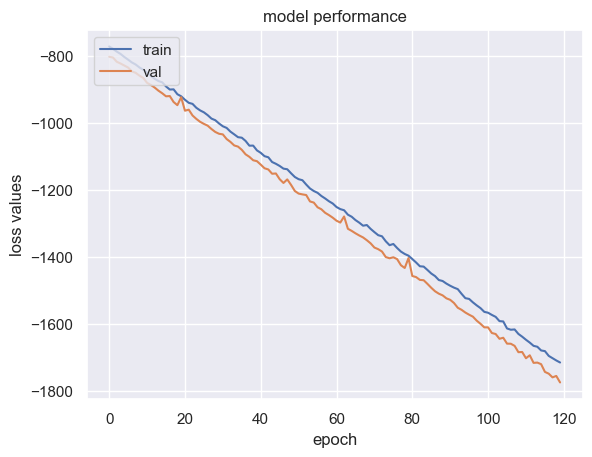

In [26]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

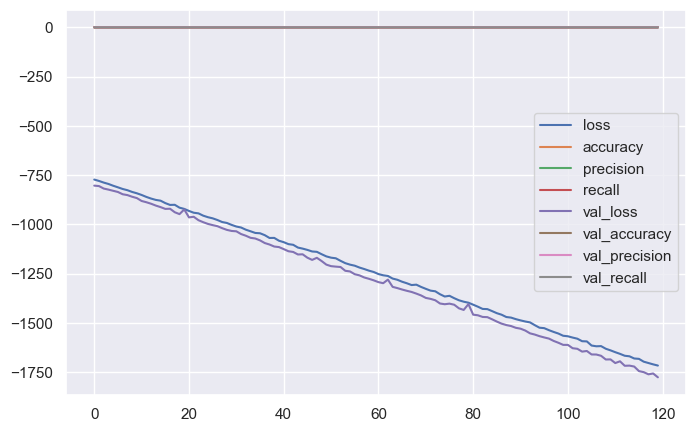

In [27]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [28]:
prediction = best_mlp_model.predict(X_test)

92/92 [==============================] - 0s 1ms/step


In [29]:
from sklearn import metrics

In [30]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction, average='weighted')
recall = metrics.recall_score(y_test, prediction, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.6997095134350036
Precision:  0.4895934031914495
Recall:  0.6997095134350036


C:\Users\jmbar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


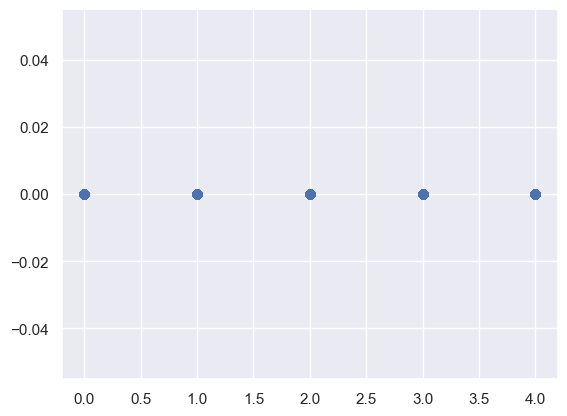

In [31]:
plt.scatter(y_test,prediction)

In [32]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)

    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

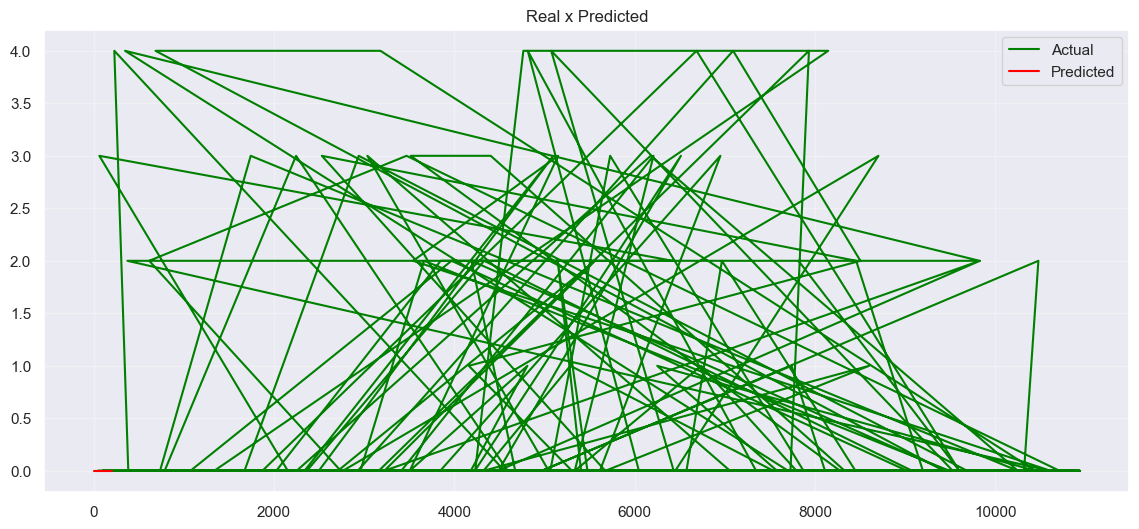

In [33]:
real_predicted_viz(200)